# Trouble Shooting
## Build Issues
### error: debug information for auto is not yet supported
Clang 3.5 cannot compile modern C++ code with debug symbols activated (option `-g`).  Be sure to specify some `CXXFLAGS` to `configure`, for instance:

    ./configure CXXFLAGS=-O2

### Warnings: argument unused

This warning is due to the use of ccache: it calls the compiler with options that have become useless, and clang complains about them:


      CXX      lib/vcsn/algos/lib_libvcsn_la-are-isomorphic.lo
    clang: warning: argument unused during compilation: '-I ../..'
    clang: warning: argument unused during compilation: '-I .'
    clang: warning: argument unused during compilation: '-isystem /opt/local/include'

To get rid of these warnings, use pass ''-Qunused-arguments'' to your compiler.  For instance:

    ./configure CXX='ccache clang++' CXXFLAGS='-Qunused-arguments'
    
## Runtime Issues
### value is not starrable: 1
In a way or another, you asked for the computation of $1^*$ in a semiring that does not support it.  For instance the rational expression ${a^*}^*$ is invalid in $\mathbb{Q}$:

In [1]:
import vcsn
try:
    vcsn.Q.expression('a**').automaton()
except RuntimeError as err:
    import sys
    print("RuntimeError:", err, file=sys.stderr)

RuntimeError: Q: value is not starrable: 1
  while computing expansion of: a**
  while computing derived-term of: a**


This computation is valid in $\mathbb{B}$:

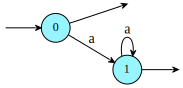

In [2]:
vcsn.B.expression('a**').automaton()